In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

lang = ['Du', 'En', 'Ge', 'It', 'Ja', 'Sp', 'Ta']

We first want to read in the 10 normalized and 10 lowpassed dataframes.

In [18]:
# Create normalized and lowpassed dataframes
li_lp = []
li_no = []

# Read in data from each individual participant
for filename in os.listdir('./'):
    if filename.startswith("lp300") and filename.endswith(".csv"):
        df = pd.read_csv(filename)
        df['subj_id'] = filename.split("_")[2]
        li_lp.append(df)
        
    if filename.startswith("normalized") and filename.endswith(".csv"):
        df = pd.read_csv(filename)
        df['subj_id'] = filename.split("_")[2]
        li_no.append(df)

# Combine data from individual participants into one dataframe
df_lowpassed = pd.concat(li_lp)
df_normalized = pd.concat(li_no)

# Reset Indices
df_lowpassed.index = range(len(df_lowpassed))
df_normalized.index = range(len(df_normalized))

We then want to clean both of these dataframes a bit and only leave L1, L2, and response, so that we can perform analysis.
We also want to make sure L1 precedes L2 alphabetically, which will be helpful for grouping later on.

In [19]:
# only leave the columns we want
df_lowpassed = df_lowpassed[['L1', 'L2', 'response']]
df_normalized = df_normalized[['L1', 'L2', 'response']]
    
# swap columns such that L1 preceds L2 alphabetically
df_lowpassed.loc[df_lowpassed['L1'] > df_lowpassed['L2'], ['L1', 'L2']] = df_lowpassed.loc[df_lowpassed['L1'] > df_lowpassed['L2'], ['L2', 'L1']].values
df_normalized.loc[df_normalized['L1'] > df_normalized['L2'], ['L1', 'L2']] = df_normalized.loc[df_normalized['L1'] > df_normalized['L2'], ['L2', 'L1']].values


We now want to group by results and create a basic 2D plot that summarizes the results for both normalized and lowpassed data.

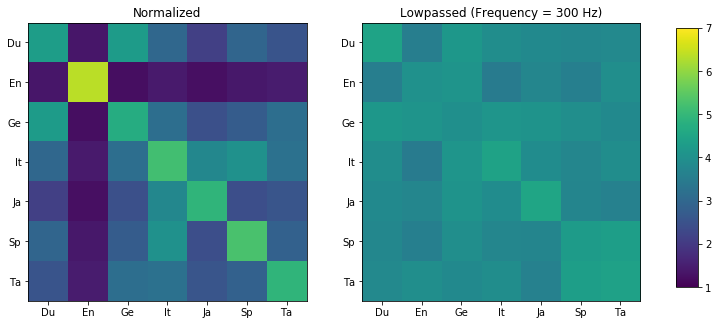

In [20]:
# Use groupby to group by L1 and L2
df_norm_gb = df_normalized.groupby(['L1', 'L2'], as_index = False)
df_lp_gb = df_lowpassed.groupby(['L1', 'L2'], as_index = False)

# Create mean dataframes
means_norm = df_norm_gb.mean()
means_lp = df_lp_gb.mean()

# Create 2d Arrays
array_norm = [[means_norm.loc[((means_norm['L1'] == lang[i]) & (means_norm['L2'] == lang[j])) |
                ((means_norm['L1'] == lang[j]) & (means_norm['L2'] == lang[i])), 'response'].values[0] 
                  for i in range(len(lang))] 
                  for j in range(len(lang))]
array_lp = [[means_lp.loc[((means_lp['L1'] == lang[i]) & (means_lp['L2'] == lang[j])) |
                ((means_lp['L1'] == lang[j]) & (means_lp['L2'] == lang[i])), 'response'].values[0]
                  for i in range(len(lang))]
                  for j in range(len(lang))]

# Plot
fig, ax = plt.subplots(1,2, figsize = (10, 6))
img = ax[0].imshow(array_norm, vmin = 1, vmax = 7)
ax[0].set_xticks(range(len(lang)))
ax[0].set_xticklabels(lang)
ax[0].set_yticks(range(len(lang)))
ax[0].set_yticklabels(lang)
ax[0].set_ylim(len(lang)-0.5, -0.5)
ax[0].set_title("Normalized")

ax[1].imshow(array_lp, vmin = 0, vmax = 7)
ax[1].set_xticks(range(len(lang)))
ax[1].set_xticklabels(lang)
ax[1].set_yticks(range(len(lang)))
ax[1].set_yticklabels(lang)
ax[1].set_ylim(len(lang)-0.5, -0.5)
ax[1].set_title("Lowpassed (Frequency = 300 Hz)")

plt.subplots_adjust(bottom=0.1, left=0.05)
cax = plt.axes([0.95, 0.2, 0.03, 0.6])
plt.colorbar(img, cax=cax)

# Save
plt.savefig('pilot_results_both.png')

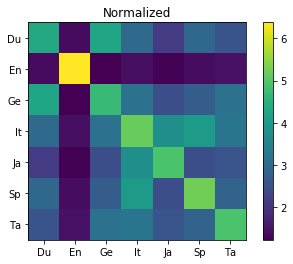

In [21]:
# Plot Normalized Only
fig, ax = plt.subplots()
img = ax.imshow(array_norm)
ax.set_xticks(range(len(lang)))
ax.set_xticklabels(lang)
ax.set_yticks(range(len(lang)))
ax.set_yticklabels(lang)
ax.set_ylim(len(lang)-0.5, -0.5)
ax.set_title("Normalized")
plt.colorbar(img)

plt.savefig('pilot_results_normalized')

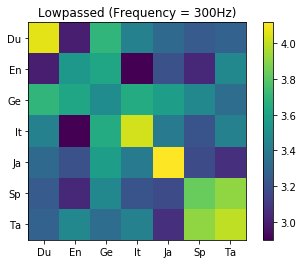

In [22]:
# Plot Lowpassed Only
fig, ax = plt.subplots()
img = ax.imshow(array_lp)
ax.set_xticks(range(len(lang)))
ax.set_xticklabels(lang)
ax.set_yticks(range(len(lang)))
ax.set_yticklabels(lang)
ax.set_ylim(len(lang)-0.5, -0.5)
ax.set_title("Lowpassed (Frequency = 300Hz)")
plt.colorbar(img)

plt.savefig('pilot_results_lowpassed')